# Time series analysis and prediction
# Monthly House Price Index

### Read me

Data: Imported from Quandl
Data available from 1975-01-31 to 2017-12-31
States: 53 states
prediction for 2018 thru to 2019

install:
pip install quandl


references:  
http://www.statsmodels.org/stable/index.html  
https://www.kaggle.com/zoupet/predictive-analysis-with-different-approaches  
https://www.otexts.org/fpp/8/1  
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/  
https://people.duke.edu/~rnau/411arim3.htm  

Business understanding  
Data understanding  
Data preparation  
Modeling  
Evaluation  
Deployment  

https://people.duke.edu/~rnau/arimrule.htm



## 1. Business understanding 

A house price index (HPI) measures the price changes of residential housing. Methodologies commonly used to calculate a HPI are the hedonic regression (HR), simple moving average (SMA) and repeat-sales regression (RSR).

The HPI is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties in 363 metropolises. This information is obtained by reviewing repeat mortgage transactions on single-family properties whose mortgages have been purchased or securitized by Fannie Mae or Freddie Mac since January 1975.

Since the HPI index only includes houses with mortgages within the conforming amount limits, the index has a natural cap and does not account for jumbo mortgages.

The HPI was developed in conjunction with OFHEO's (now FHFA) responsibilities as a regulator of Fannie Mae and Freddie Mac. It is used to measure the adequacy of their capital against the value of their assets, which are primarily home mortgages.

On July 30, 2008 OFHEO became part of the new Federal Housing Finance Agency (FHFA). The index is now termed the FHFA HPI.

## 2. Data understanding 

In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.dates as mdates
import matplotlib.cbook as cbook

yearsFmt = mdates.DateFormatter('%Y')

In [38]:
df = quandl.get("FMAC/HPI",authtoken='17Mo2hFy4sxvxngrx7K1')
#df['Date'] = df['Date'].astype(str)
df2 = df.reset_index()
df2.head()

,Date,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,TX,UT,VA,VT,WA,WI,WV,WY,United States not seasonaly adjusted,United States seasonaly adjusted
0,1975-01-31,34.371830,35.695975,36.738861,28.937735,15.722312,19.603977,24.369431,18.255987,27.264842,...,32.602350,24.698474,27.912640,26.637620,17.484315,28.096764,41.002072,31.668794,23.497479,23.471007
1,1975-02-28,34.880945,35.896770,37.098962,29.463708,15.775202,19.837138,24.908036,18.382701,27.250734,...,32.944116,25.060977,28.205810,26.956271,17.571053,28.486170,42.040473,32.161920,23.648785,23.629873
2,1975-03-31,35.402217,36.133518,37.416398,29.959514,15.964942,20.073483,25.313556,18.514587,27.268478,...,33.542975,25.381341,28.420407,27.264731,17.689717,28.860737,43.122486,32.680525,23.895294,23.844527
3,1975-04-30,35.944703,36.425723,37.677813,30.345148,16.275547,20.301864,25.541141,18.689302,27.362673,...,34.402826,25.627200,28.578762,27.546568,17.818792,29.185048,44.239196,33.210124,24.216495,24.111771
4,1975-05-31,36.535272,36.695708,37.921099,30.546449,16.533017,20.495075,25.614056,18.937116,27.561893,...,34.649755,25.782334,28.717611,27.794738,17.933277,29.443523,45.363222,33.714128,24.416894,24.261528


In [41]:
colNames = list(df.drop(['United States not seasonaly adjusted','United States seasonaly adjusted'], axis=1))
hpi_data = pd.melt(df2, id_vars='Date', value_vars=colNames)
hpi_data.set_index('Date',inplace=True)
hpi_data.head()

,variable,value
Date,,
1975-01-31,AK,34.371830
1975-02-28,AK,34.880945
1975-03-31,AK,35.402217
1975-04-30,AK,35.944703
1975-05-31,AK,36.535272


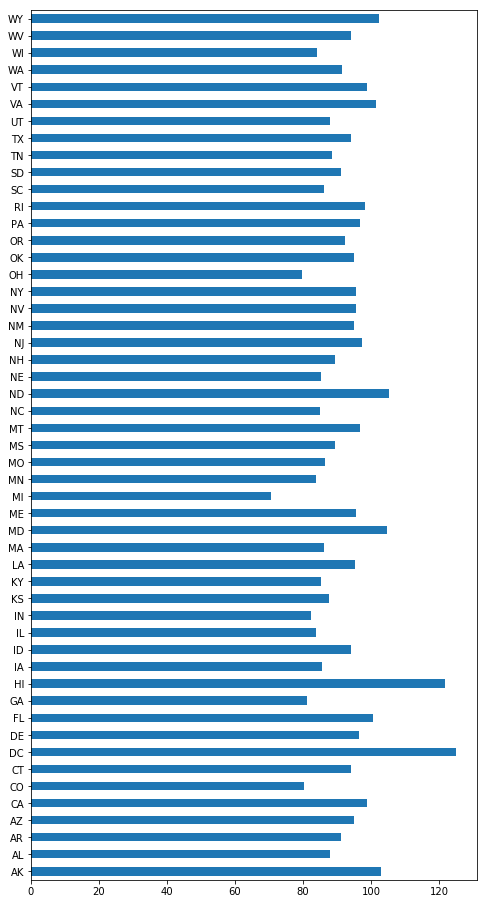

In [3]:
df.drop(['United States not seasonaly adjusted','United States seasonaly adjusted'], axis=1).mean().plot(kind="barh", figsize=(8,16))
plt.show()

In [4]:
df.drop(['United States not seasonaly adjusted','United States seasonaly adjusted'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
AK,516.0,102.875146,42.747525,34.371830,71.475014,88.013799,153.694925,180.863076
AL,516.0,88.040519,30.895907,35.695975,60.916431,87.341799,116.723347,138.465286
AR,516.0,91.188402,30.793567,36.738861,67.407430,89.043207,124.525276,143.883305
AZ,516.0,94.970954,46.529913,28.828753,62.734450,80.296267,122.786745,205.359961
CA,516.0,98.671997,59.588989,15.722312,47.367816,77.996474,138.804713,224.416791
CO,516.0,80.396637,42.734426,19.603977,44.712150,70.600083,116.201648,191.251430
CT,516.0,94.066850,41.049448,24.369431,60.955424,91.164669,132.079228,165.816399
DC,516.0,124.958312,96.196584,18.255987,45.671222,72.375075,223.236945,346.407731
DE,516.0,96.341865,46.746919,27.250734,53.015365,83.426668,144.967509,177.933370
FL,516.0,100.434160,51.468212,30.997043,61.731919,80.156046,132.580171,224.523335


In [5]:
#Check for duplicates
df.duplicated()

Date
1975-01-31    False
1975-02-28    False
1975-03-31    False
1975-04-30    False
1975-05-31    False
1975-06-30    False
1975-07-31    False
1975-08-31    False
1975-09-30    False
1975-10-31    False
1975-11-30    False
1975-12-31    False
1976-01-31    False
1976-02-29    False
1976-03-31    False
1976-04-30    False
1976-05-31    False
1976-06-30    False
1976-07-31    False
1976-08-31    False
1976-09-30    False
1976-10-31    False
1976-11-30    False
1976-12-31    False
1977-01-31    False
1977-02-28    False
1977-03-31    False
1977-04-30    False
1977-05-31    False
1977-06-30    False
              ...  
2015-07-31    False
2015-08-31    False
2015-09-30    False
2015-10-31    False
2015-11-30    False
2015-12-31    False
2016-01-31    False
2016-02-29    False
2016-03-31    False
2016-04-30    False
2016-05-31    False
2016-06-30    False
2016-07-31    False
2016-08-31    False
2016-09-30    False
2016-10-31    False
2016-11-30    False
2016-12-31    False
2017-01-31    F

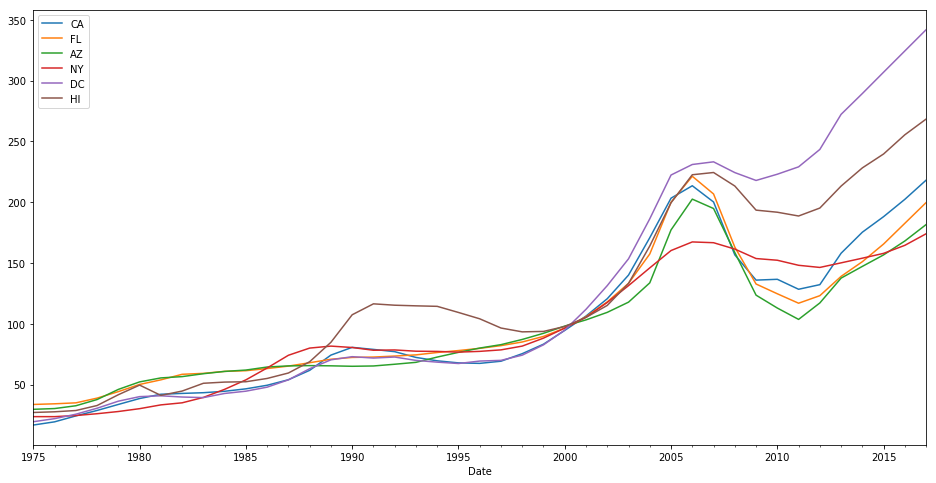

In [6]:
df[['CA','FL','AZ','NY','DC','HI']].resample('A').mean().plot(figsize=(16,8))
plt.legend()
plt.show()

### For analysis and prediction let us pick only CA

In [33]:
cali = df[['CA']]
cali.head()

,CA
Date,
1975-01-31,15.722312
1975-02-28,15.775202
1975-03-31,15.964942
1975-04-30,16.275547
1975-05-31,16.533017


In [34]:
cali.describe()

,CA
count,516.000000
mean,98.671997
std,59.588989
min,15.722312
25%,47.367816
50%,77.996474
75%,138.804713
max,224.416791


In [35]:
cali.duplicated()

Date
1975-01-31    False
1975-02-28    False
1975-03-31    False
1975-04-30    False
1975-05-31    False
1975-06-30    False
1975-07-31    False
1975-08-31    False
1975-09-30    False
1975-10-31    False
1975-11-30    False
1975-12-31    False
1976-01-31    False
1976-02-29    False
1976-03-31    False
1976-04-30    False
1976-05-31    False
1976-06-30    False
1976-07-31    False
1976-08-31    False
1976-09-30    False
1976-10-31    False
1976-11-30    False
1976-12-31    False
1977-01-31    False
1977-02-28    False
1977-03-31    False
1977-04-30    False
1977-05-31    False
1977-06-30    False
              ...  
2015-07-31    False
2015-08-31    False
2015-09-30    False
2015-10-31    False
2015-11-30    False
2015-12-31    False
2016-01-31    False
2016-02-29    False
2016-03-31    False
2016-04-30    False
2016-05-31    False
2016-06-30    False
2016-07-31    False
2016-08-31    False
2016-09-30    False
2016-10-31    False
2016-11-30    False
2016-12-31    False
2017-01-31    F

# Exploratory data analysis

### HPI of California


#### Simple Moving Average:

In [39]:
cali['CA SMA 2 years'] = cali['CA'].rolling(24).mean()
cali['CA SMA 5 years'] = cali['CA'].rolling(60).mean()
cali['CA SMA 6 months'] = cali['CA'].rolling(6).mean()


C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

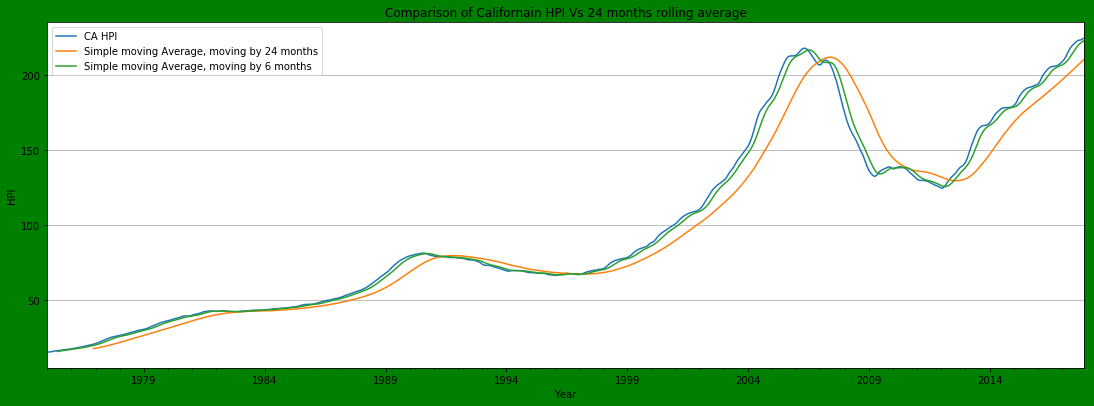

In [40]:
fig = plt.figure(figsize=(18,6),facecolor='g')
axs = fig.add_axes([0.1,0.1,0.8,0.8])
cali['CA'].plot(label="CA HPI")
cali['CA SMA 2 years'].plot(label="Simple moving Average, moving by 24 months")
cali['CA SMA 6 months'].plot(label="Simple moving Average, moving by 6 months")
axs.set_title("Comparison of Californain HPI Vs 24 months rolling average")
axs.set_xlabel("Year")
axs.set_ylabel("HPI")
axs.yaxis.grid(True)
plt.legend()
plt.show()

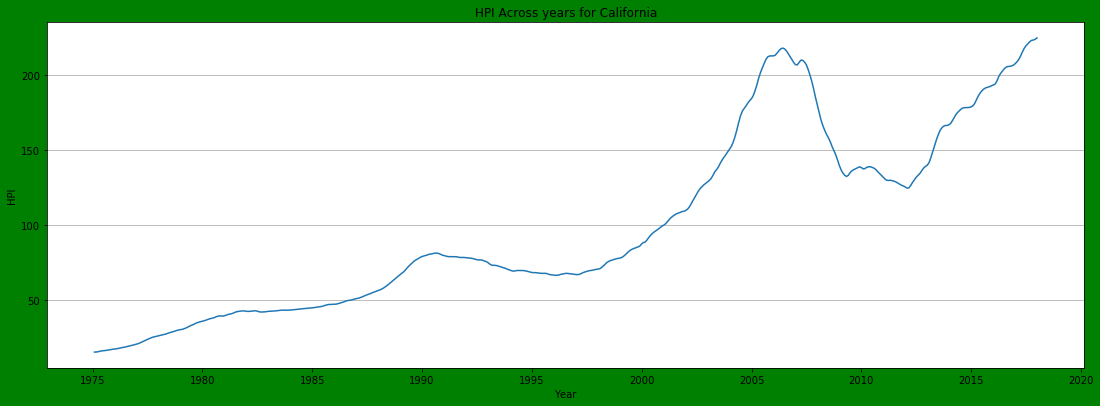

In [96]:
fig = plt.figure(figsize=(18,6),facecolor='g')
axs = fig.add_axes([0.1,0.1,0.8,0.8])
axs.plot(cali.index, cali['CA'])
axs.yaxis.grid(True)
axs.set_title("HPI Across years for California")
axs.set_xlabel("Year")
axs.set_ylabel("HPI")

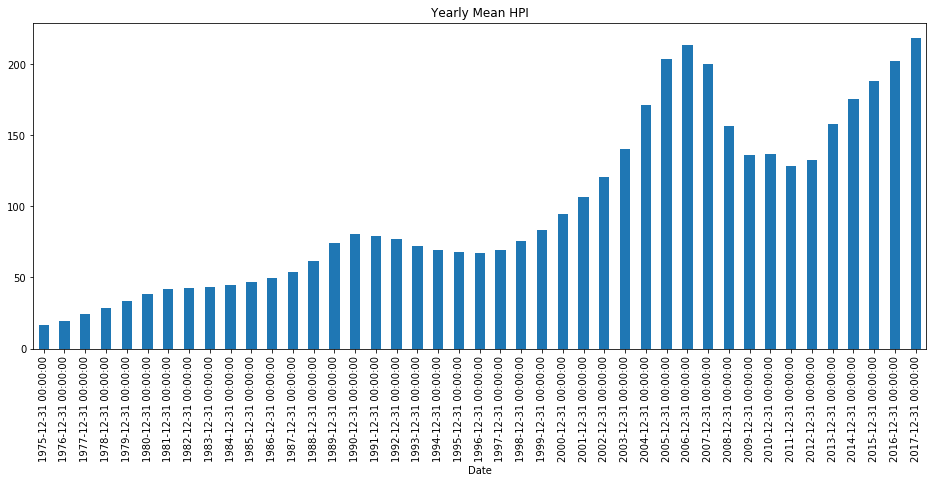

In [62]:
cali['CA'].resample('A').mean().plot(kind='bar', figsize=(16,6))
plt.title('Yearly Mean HPI')

#### Exponential weighted Moving Average:

In [43]:
cali['CA EWMA 2 years'] = cali['CA'].ewm(span=24).mean()
cali['CA EWMA 5 years'] = cali['CA'].ewm(span=60).mean()
cali['CA EWMA 6 months'] = cali['CA'].ewm(span=6).mean()
cali['CA EWMA 12 months'] = cali['CA'].ewm(span=12).mean()


C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

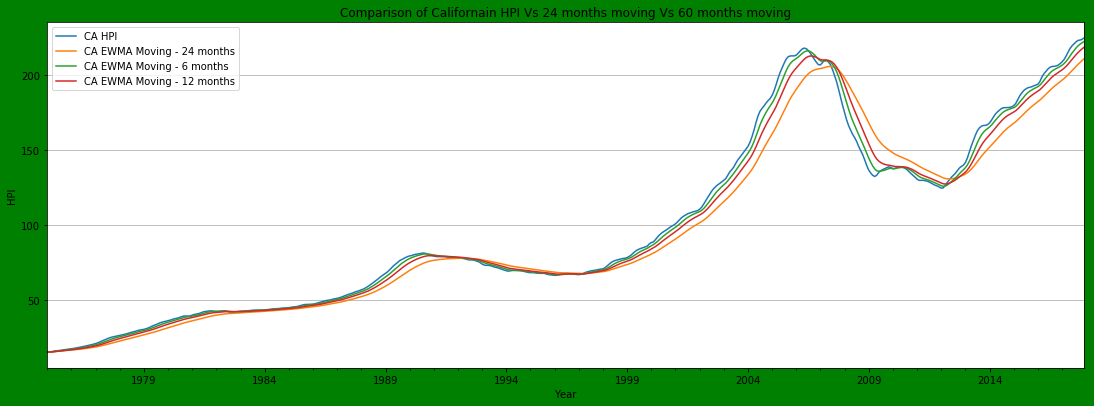

In [44]:
# weighted average, weighted exponentially for last 2 years
fig = plt.figure(figsize=(18,6),facecolor='g')
axs = fig.add_axes([0.1,0.1,0.8,0.8])
cali['CA'].plot(label="CA HPI")
#cali['CA SMA 2 years'].plot(label="CA SMA Moving - 24 months")
# cali['CA SMA 6 months'].plot(label="CA SMA Moving - 6 months")
cali['CA EWMA 2 years'].plot(label="CA EWMA Moving - 24 months")
cali['CA EWMA 6 months'].plot(label="CA EWMA Moving - 6 months")
cali['CA EWMA 12 months'].plot(label="CA EWMA Moving - 12 months")
axs.set_title("Comparison of Californain HPI Vs 24 months moving Vs 60 months moving")
axs.set_xlabel("Year")
axs.set_ylabel("HPI")
axs.yaxis.grid(True)
plt.legend()
plt.show()

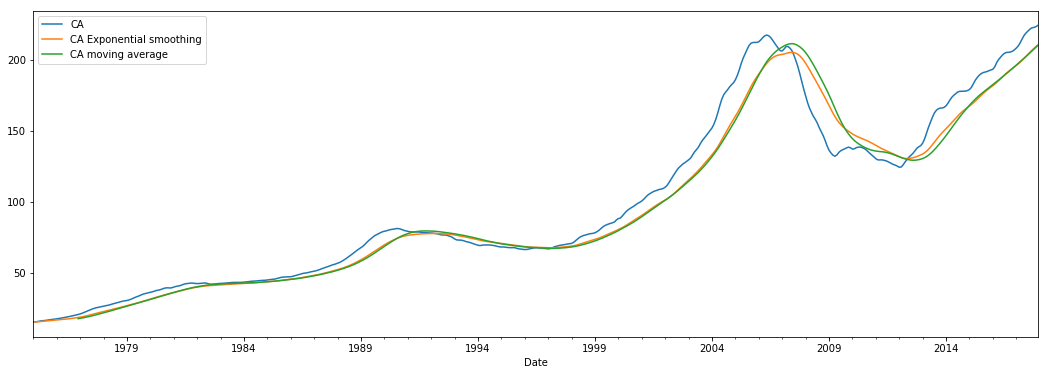

In [25]:
cali[['CA','CA Exponential smoothing','CA moving average']].plot(figsize=(18,6))
plt.legend()
plt.show()

## Autocorrelation: Correlation of a time series with a lagged copy of itself

In [26]:
cali['CA'].autocorr()

0.99977491856548917

### Observations:

Trend is not stationary
There is no seasonality effect.
2005 thru 2007 saw good spike in houseprices.


### closer look of last 12 years

In [57]:
df.columns

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY', 'United States not seasonaly adjusted',
       'United States seasonaly adjusted'],
      dtype='object')

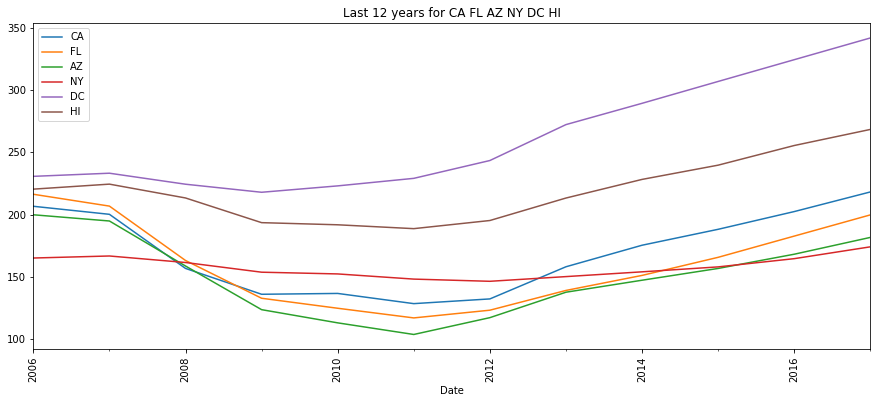

In [60]:
#cali['CA']['2006-12-31':].resample('A').mean().plot(kind='bar', figsize=(15,4), facecolor='y')
df[['CA','FL','AZ','NY','DC','HI']]['2006-12-31':].resample('A').mean().plot(figsize=(15,6))
#df['FL']['2006-12-31':].resample('A').mean().plot()
plt.title('Last 12 years for CA FL AZ NY DC HI')
_=plt.xticks(rotation=90)
plt.legend()
plt.show()

### Closer look at 2017

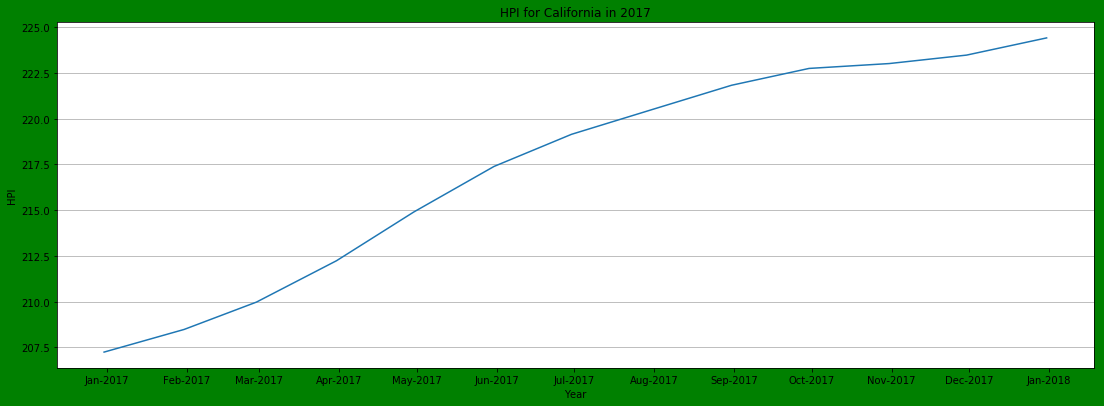

In [105]:
fig = plt.figure(figsize=(18,6),facecolor='g')
axs = fig.add_axes([0.1,0.1,0.8,0.8])
axs.plot(cali['2016-12-31':'2017-12-31'].index, cali['CA']['2016-12-31':'2017-12-31'])
axs.yaxis.grid(True)

# format
axs.xaxis.set_major_locator(mdates.MonthLocator())
# b-Y mmm-YYYY
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

axs.set_title("HPI for California in 2017")
axs.set_xlabel("Year")
axs.set_ylabel("HPI")
plt.show()

C:\Users\Preeti\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


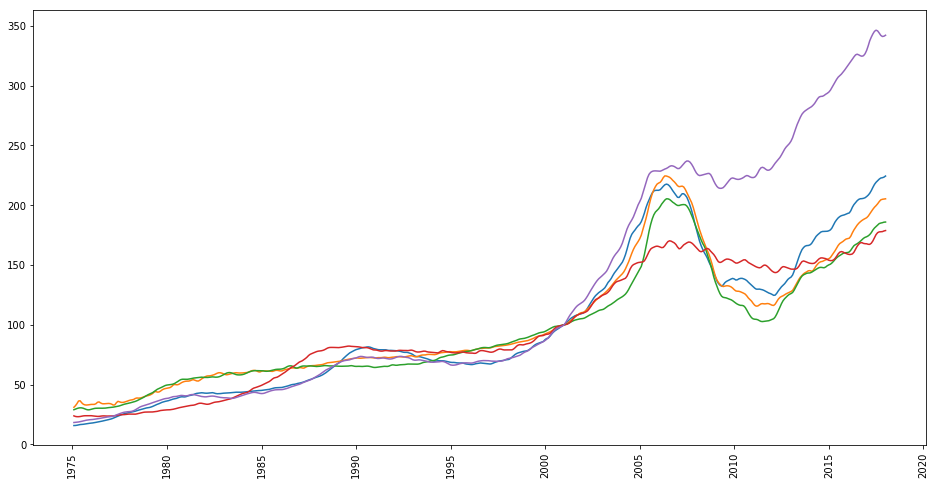

In [78]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(df[['CA','FL','AZ','NY','DC']].index, df[['CA','FL','AZ','NY','DC']])
#ax.set_xticks(df.index)
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_major_formatter(yearsFmt)
_=plt.xticks(rotation=90)
plt.legend()
plt.show()

## Trend analysis using python statsmodel

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose;
import statsmodels.api as sm;

In [41]:
result = seasonal_decompose(cali['CA'],model='additive')

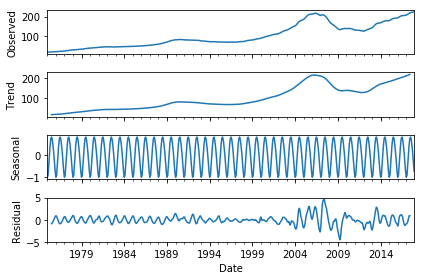

In [82]:
fig = result.plot()

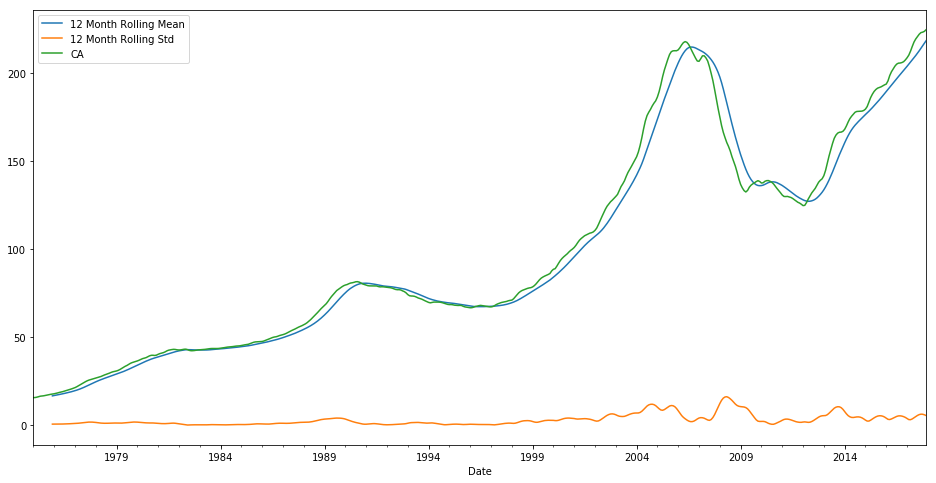

In [117]:
cali['CA'].rolling(12).mean().plot(label='12 Month Rolling Mean', figsize=(16,8))
cali['CA'].rolling(12).std().plot(label='12 Month Rolling Std')
cali['CA'].plot()
plt.legend()
plt.show()

In [47]:
# Tuple unpacking
hpi_cycle, hpi_trend = sm.tsa.filters.hpfilter(cali.CA)

In [60]:
df["hpi_trend_CA"] = hpi_trend;

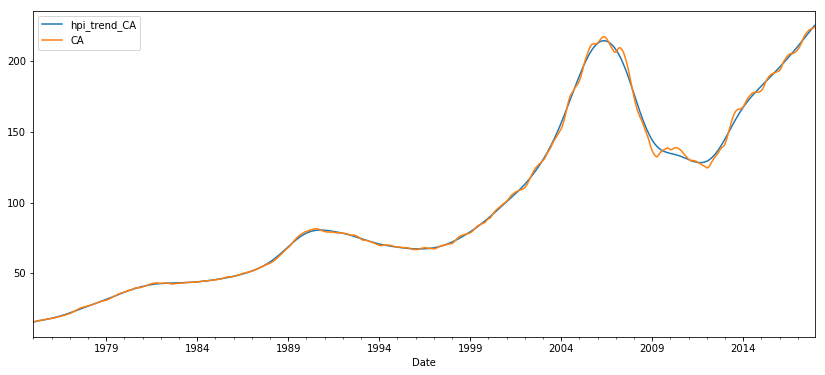

In [62]:
df[["hpi_trend_CA",'CA']].plot(figsize=(14,6))

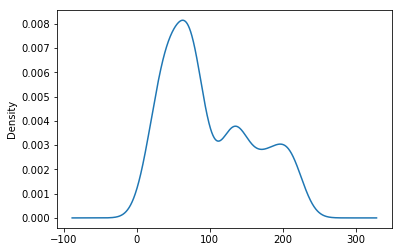

In [63]:
cali['CA'].plot.kde()

## Testing for Stationarity

We can use the Augmented [Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

- constant mean  
- constant variance  
- an autocovariance that does not depend on time  

Basically, we are trying to whether to accept the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Let's run the Augmented Dickey-Fuller test on our data:

In [75]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print( 'Dickey-Fuller Test Results:')
    print( '---------------------------')

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    if dftest[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


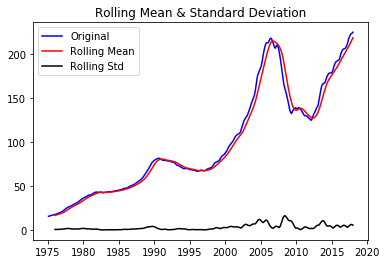

Dickey-Fuller Test Results:
---------------------------
Test Statistic                  -0.654228
p-value                          0.858252
#Lags Used                      19.000000
Number of Observations Used    496.000000
Critical Value (1%)             -3.443603
Critical Value (5%)             -2.867385
Critical Value (10%)            -2.569883
dtype: float64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [76]:
result = test_stationarity(cali['CA'])

C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Preeti\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


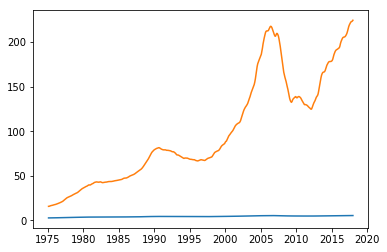

In [80]:
cali['log_CA'] = np.log(cali['CA'])
plt.plot(cali[['log_CA','CA']])
plt.legend()
plt.show()

C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


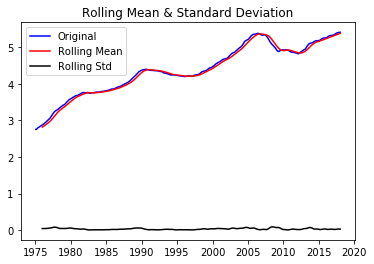

Dickey-Fuller Test Results:
---------------------------
Test Statistic                  -1.501650
p-value                          0.532695
#Lags Used                      19.000000
Number of Observations Used    496.000000
Critical Value (1%)             -3.443603
Critical Value (5%)             -2.867385
Critical Value (10%)            -2.569883
dtype: float64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [81]:
result = test_stationarity(cali['log_CA'])

## Differencing to make Time Series stationary

In [84]:
cali['CA First Order Difference'] = cali['CA'] - cali['CA'].shift(1)
cali['log_CA First Order Difference'] = cali['log_CA'] - cali['log_CA'].shift(1)

C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


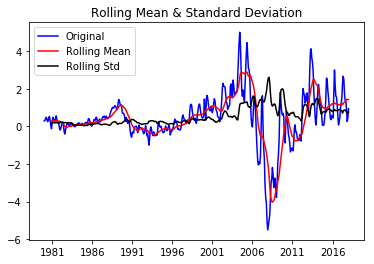

Dickey-Fuller Test Results:
---------------------------
Test Statistic                  -3.065447
p-value                          0.029218
#Lags Used                      18.000000
Number of Observations Used    438.000000
Critical Value (1%)             -3.445368
Critical Value (5%)             -2.868161
Critical Value (10%)            -2.570297
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [86]:
cali.dropna(inplace=True)
test_stationarity(cali['CA First Order Difference'])

In [89]:
#ACF and PACF plots:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

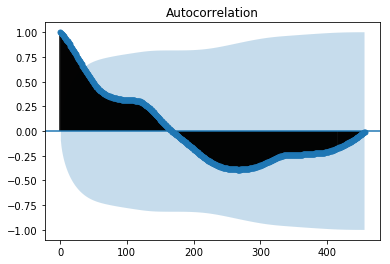

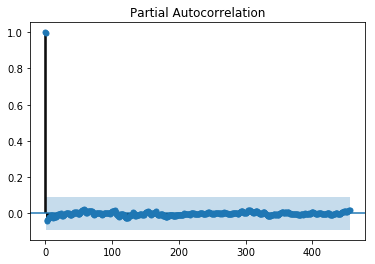

In [101]:
acf_plot = plot_acf(cali['CA'].dropna())
pacf_plot = plot_pacf(cali['CA'].dropna())

[]

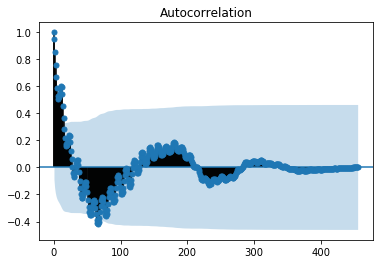

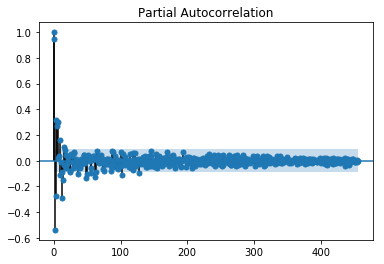

In [118]:
# Duplicate plots
# Check out: https://stackoverflow.com/questions/21788593/statsmodels-duplicate-charts
# https://github.com/statsmodels/statsmodels/issues/1265
acf_plot = plot_acf(cali['CA First Order Difference'].dropna())
pacf_plot = plot_pacf(cali['CA First Order Difference'].dropna())
plt.plot(figsize=(16,6))

### ARIMA model

In [96]:
# Load the statsmodels api
import statsmodels.api as sm

### Identifying the numbers of AR or MA terms in an ARIMA model
### p,d,q parameters

Based on the Dickey-Fuller test and ACF and PACF graph, we will assign p,d,q values as:

In [121]:
from statsmodels.tsa.arima_model import ARIMA
#  p: The number of lag observations included in the model.
p = 0;

# d: The number of times that the raw observations are differenced, also called the degree of differencing.
d = 1;

# q: The size of the moving average window, also called the order of moving average.
q=0;

In [184]:
arima_model = ARIMA(cali['CA']['2006-12-31':],order=(7,1,1))
arima_fit = arima_model.fit()
print(arima_fit.aic)
print(arima_fit.model.__class__.__name__ + order)

148.97775287007525


In [208]:
order = str((arima_fit.k_ar, arima_fit.k_diff, arima_fit.k_ma))
print(arima_fit.model.__class__.__name__ + order)
print(arima_fit.data.orig_endog.tail(1))
dir(arima_fit.model.__class__.__name__)

ARIMA(7, 1, 1)
Date
2017-12-31    224.416791
Name: CA, dtype: float64


['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [154]:
print(arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.CA   No. Observations:                  132
Model:                 ARIMA(7, 1, 1)   Log Likelihood                 -64.489
Method:                       css-mle   S.D. of innovations              0.381
Date:                Sun, 06 May 2018   AIC                            148.978
Time:                        14:41:25   BIC                            177.806
Sample:                    01-31-2007   HQIC                           160.692
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0455      0.788      0.058      0.954      -1.499       1.590
ar.L1.D.CA     1.0906      0.087     12.594      0.000       0.921       1.260
ar.L2.D.CA    -0.2403      0.129     -1.863      0.0

### Plot actual Vs Fitted lines

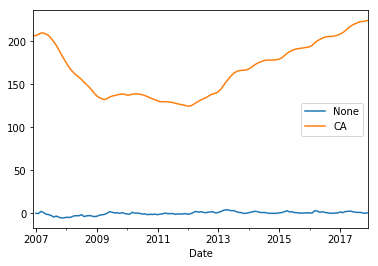

In [156]:
arima_fit.fittedvalues.plot()
cali['CA']['2006-12-31':].plot()
plt.legend()
plt.show()

## ARIMA results observations:
AIC
BIC


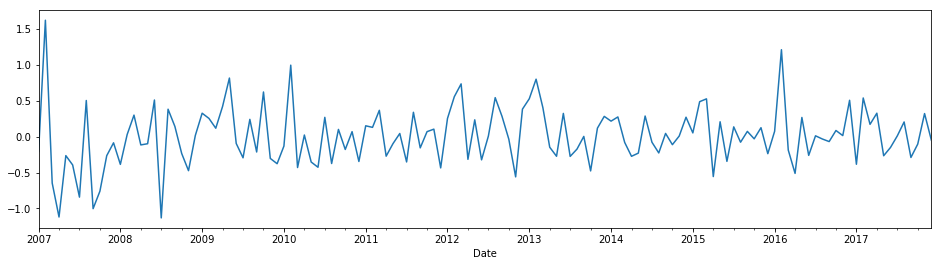

In [157]:
arima_fit.resid.plot(figsize=(16,4))

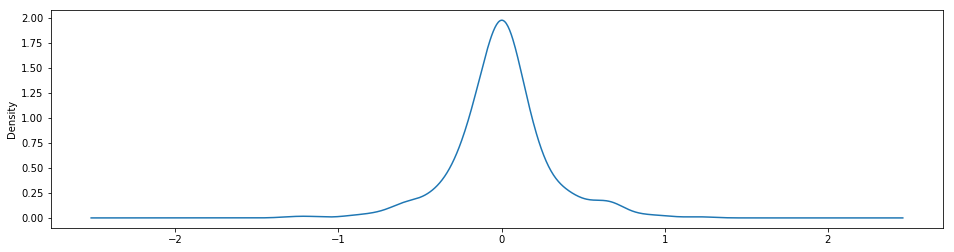

In [136]:
arima_fit.resid.plot(kind='kde', figsize=(16,4))

                                 Statespace Model Results                                
Dep. Variable:                          D.DS2.CA   No. Observations:                  106
Model:             SARIMAX(7, 0, 0)x(1, 0, 0, 2)   Log Likelihood                 -55.763
Date:                           Sun, 06 May 2018   AIC                            129.526
Time:                                   14:46:22   BIC                            153.497
Sample:                               03-31-2009   HQIC                           139.241
                                    - 12-31-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6148      0.105     15.400      0.000       1.409       1.820
ar.L2         -1.4179      0.210     -6.753

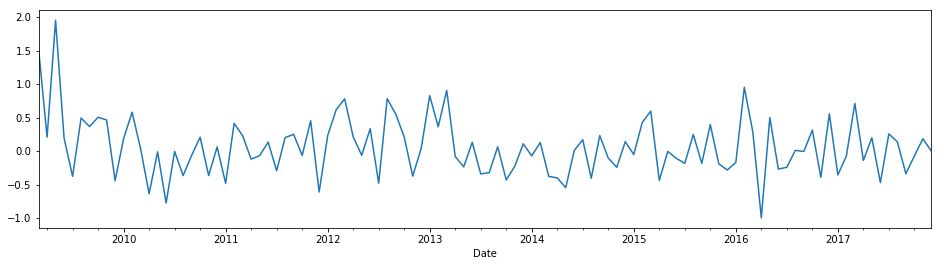

In [163]:
# Fit the model
sarima_model = sm.tsa.statespace.SARIMAX(cali['CA']['2008-12-31':], order=(7,1,0), seasonal_order=(1,1,0,2), simple_differencing=True)
sarima_fit = sarima_model.fit(disp=False)
print(sarima_fit.summary())
sarima_fit.resid.plot(figsize=(16,4))

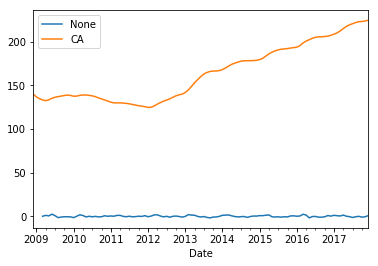

In [164]:
sarima_fit.fittedvalues.plot()
cali['CA']['2008-12-31':].plot()
plt.legend()
plt.show()

In [174]:
import statsmodels.tsa.arima_model.ARMAResults

In [180]:
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                          D.DS2.CA   No. Observations:                  106
Model:             SARIMAX(7, 0, 0)x(1, 0, 0, 2)   Log Likelihood                 -55.763
Date:                           Sun, 06 May 2018   AIC                            129.526
Time:                                   15:03:40   BIC                            153.497
Sample:                               03-31-2009   HQIC                           139.241
                                    - 12-31-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6148      0.105     15.400      0.000       1.409       1.820
ar.L2         -1.4179      0.210     -6.753      0.000      -1.829      -1.006
ar.L3          1.0439      0.275      3.802      0.000       0.506       1.582
ar.L4         -1.0966      0.228     -4.801      0.000      -1.544      -0.649
ar.L5          0.9602      0.218      4.414      0.000       0.534       1.387
ar.L6         -0.7312      0.187     -3.909      0.000      -1.098      -0.365
ar.L7          0.2138      0.111      1.924      0.054      -0.004       0.432
ar.S.L2       -0.7064      0.125     -5.671      0.000      -0.951      -0.462
sigma2         0.1586      0.024      6.527      0.000       0.111       0.206
===================================================================================
Ljung-Box (Q):                       55.25   Jarque-Bera (JB):                 1.57
Prob(Q):                              0.05   Prob(JB):                         0.46
Heteroskedasticity (H):               0.88   Skew:                             0.29
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [182]:
print("SARIMA",sarima_fit.aic)
print(arima_fit.aic)

SARIMA 129.525691914
148.97775287007525


In [ ]:
# Variables
endog = cali.ix['2005-12-31':, 'CA']
exog = sm.add_constant(data.ix['2005-12-31':, 'm2'])
nobs = endog.shape[0]

# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog.ix[:'1978-01-01'], exog=exog.ix[:'1978-01-01'], order=(1,0,1))
fit_res = mod.fit(disp=False)

In [119]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(cali['CA'],  order=(20,2,2))
res = mod.fit(disp=False)
print(res.summary())
res.plot_diagnostics(figsize=(15,12))
plt.show()

ValueError: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.

In [ ]:
mod = sm.tsa.statespace.SARIMAX(cali,
                                    order = (2, 0, 4),
                                    seasonal_order = (3, 1, 2, 12),
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)
results = mod.fit()
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [126]:
# Fit a local level model
mod_var1 = sm.tsa.VARMAX(cali['CA'],order=(0,1,0))
# Note that mod_var1 is an instance of the VARMAX class

# Fit the model via maximum likelihood
res_var1 = mod_var1.fit()
# Note that res_var1 is an instance of the VARMAXResults class

# Show the summary of results
print(res_var1.summary())

# Construct impulse responses
irfs = res_ll.impulse_responses(steps=10)

IndexError: tuple index out of range

In [131]:
# We have seasonal data!
model = sm.tsa.statespace.ARIMA(df['CA'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

AttributeError: module 'statsmodels.tsa.statespace.api' has no attribute 'ARIMA'

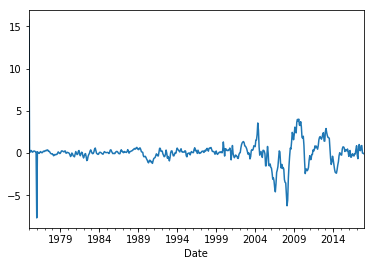

In [127]:
results.resid.plot()

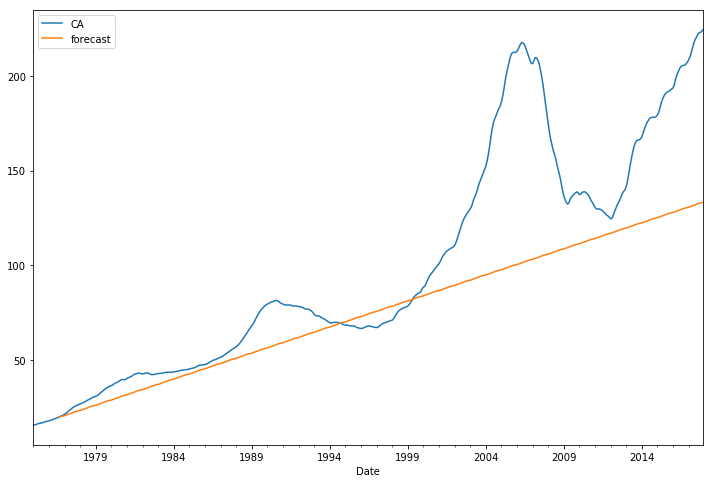

In [130]:
df['forecast'] = results.predict(start = 20, end= 568, dynamic= True)  
df[['CA','forecast']].plot(figsize=(12,8))

### Autoregressive Integrated Moving Average (ARIMA): –

A statistical technique that uses time series data to predict future. The parameters used in the ARIMA is (P, d, q) which refers to the autoregressive, integrated and moving average parts of the data set, respectively. ARIMA modeling will take care of trends, seasonality, cycles, errors and non-stationary aspects of a data set when making forecasts.